## Skill-Assessment Exercise 11.2

#### PROBLEM

Design a lag compensator for the system in Skill-Assessment Exercise 11.1 that will improve the steady-state error tenfold, while still operating with 20% overshoot.

#### ANSWER

The system from Skill-Assessment Exercise 11.1 is

$$
G(s) = \frac{194,200}{s(s+50)(s+120)}
$$

Following the _Design Procedure_ steps from section 11.3:

1. Set the gain K to satisfy the steady-state error specification and create Bode plots.

$G(s)$ is a Type 1 system (see Section 7.3 for more info). I would prefer that the problem explicitly state the input type (step, ramp, or parabolic). However, since the problem implies a non-zero constant error, the input must be a ramp since that is the only non-zero constant error for Type 1.

The ramp error for Type 1 is $1/K_{v}$. To reduce the error by a factor of 10, $K_{v}$ must be increased by a factor of 10. Thus, $K_{v}$ will be found and then multiplied by 10.

$$
K_{v} = \lim_{s\to0} sG(s) = \frac{194,200}{(50)(120)} = \frac{971}{30} \approx 32.366
$$

Multiplying $K_{v}$ by 10 results in $\frac{971}{3}$ $\approx $ 323.666.

Now that $K_{v}$ is 10x, K needs to be 10x so that the new 10x $K_{v}$ holds. The new K is then $194,200 \cdot 10 = 1,942,000$.

The new system with 10x less error then is 

$$
G(s) = \frac{1,942,000}{s(s+50)(s+120)}
$$

If desired, $K_{v}$ can now be verified to be 323.666 if $\lim_{s\to0} sG(s)$ is computed.

The Bode plots for $G(s)$ with the new $K$ are plotted below.


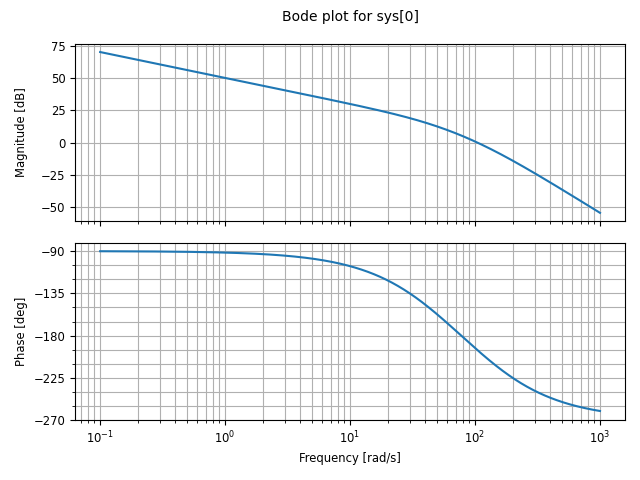

In [ ]:
#  Import libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
# Make plots interactable
%matplotlib ipympl

# Generate Bode plots for G(s)
K = 1942000 # K value so steady state error is 10x less
numg = [K]
deng = np.poly([0, -50, -120])
G = ct.tf(numg, deng)
fig = plt.figure(1)
ct.bode(G, [1e-1, 1e3], dB=True)

# Clean up unused variables
del K, numg, deng, G, fig

2. Find the frequency where the phase margin is 5° to 12° greater than the phase margin that yields the desired transient response.

The overshoot % is the same from the previous skill assessment exercise, which was found to be 48.15°. See solution for Skill-Assessment Exercise 11.1 for details.

Increase phase margin by 10°: 48.15° + 10° = 58.15°.

The beginning of the phase margin range is -180° + 58.15° = -121.85°.

Locate on the Bode plot the start of the phase margin, -121.85°. This phase occurs at 20.4 rad/s.

At $\omega = 20.4 rad/s$, the magnitude is 23.2 dB. However, we need the magnitude to be 0dB at this frequency. Thus the compensator will be designed to reduce the magnitude by 23.2 dB at this frequency.


3. Design a compensator with the necessary attenuation to force the magnitude to be 0 dB at 20.4 rad/s.

The magnitude response of the compensator will now be hand drawn. Using [semi-log paper](https://www.electronics-tutorials.ws/resources/printable-semi-log-graph-paper.html) and a ruler helps a lot.

a. Determine the upper break frequency. Make this one decade less than the phase margin frequency of 20.4 rad/s; so the upper break frequency is 2.04 or $\approx$ 2 rad/s.

b. Draw the upper frequency response from the upper break frequency to +$\infty$ rad/s, which is a constant -23 dB.

c. Determine the lower break frequency and draw the transition from 0 dB to -23 dB. Start at the lower break frequency of 2.04 rad/s and -23 dB and go left on the frequency axis and up in magnitude at a +20dB/dec slope until 0dB is reached. The frequency at this 0dB intersection is the lower break frequency. Using this method, I determined my lower break frequency to be 0.14 rad/s.

d. Draw the lower frequency response, from 0 rad/s to the lower break frequency, which is a constant 0dB.

NOTE: Rather than draw, can the lower break frequency be analytically determined using something like point slope formula? Need to be careful because the graph is not linear-linear but is semilog or log_x-linear_y.

Now there is enough information to construct the compensator transfer function. The upper break frequency is the zero and the lower break frequency is the pole.

$$
G_{c}(s) = \frac{s+2.04}{s+0.14}
$$

However, at low frequencies, the magnitude of $G_{c}(s)$ is not 1 (0 dB), so the compensator needs its own gain to force it to 1 when $s = 0$. Substitute $s = 0$ in $G_{c}(s)$ to get 2.04 / 0.14 = 14.571. Since we want $G_{c}(s)$ to be 1 when $s = 0$, make the gain equal to the inverse of 14.571, or 0.0686. Thus, the compensator function with unity gain at $s = 0$ is

$$
G_{c}(s) = 0.0686 \cdot \frac{s+2.04}{s+0.14}
$$

You can substitute $s = 0$ and compute that $G_{c}(s) = 1$ to verify this.

